In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

from datetime import datetime, timedelta

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [78]:
def get_data(stock_name, start_time, end_time):
    df = pdr.get_data_yahoo(
        stock_name,
        start=start_time,
        end=end_time
    )
    data = df.filter(['Close'])
    return data


In [79]:
def preprocess_data(data, scaler):
    scaled_data = scaler.fit_transform(data.values)
    X = []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i, 0])
    X = np.array(X)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X


In [80]:
def predict(X, model, scaler):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions)
    return predictions

In [81]:
model = keras.models.load_model('model1.h5')
scaler = MinMaxScaler(feature_range=(0,1))

2023-06-30 23:39:08.357388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-30 23:39:08.360867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-30 23:39:08.364242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [82]:
end_time = datetime.now()
start_time = datetime(end_time.year - 1, end_time.month, end_time.day)

In [83]:
raw_data = get_data('AADI', start_time, end_time)

[*********************100%***********************]  1 of 1 completed


In [84]:
for i in range(10): # predict the next 10 days
    new_date = raw_data.index[-1].to_pydatetime() + timedelta(days=1)
    X = preprocess_data(raw_data[-61:], scaler)
    pred = predict(X, model, scaler)
    # print(pred)
    raw_data.at[new_date, 'Close'] = pred[0][0]

2023-06-30 23:39:10.056959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-30 23:39:10.059014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-30 23:39:10.060753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 41ms/step


In [85]:
raw_data

,Close
Date,
2022-06-30,12.320000
2022-07-01,12.770000
2022-07-05,13.430000
2022-07-06,13.450000
2022-07-07,13.700000
...,...
2023-07-06,6.840198
2023-07-07,6.491580
2023-07-08,6.402323


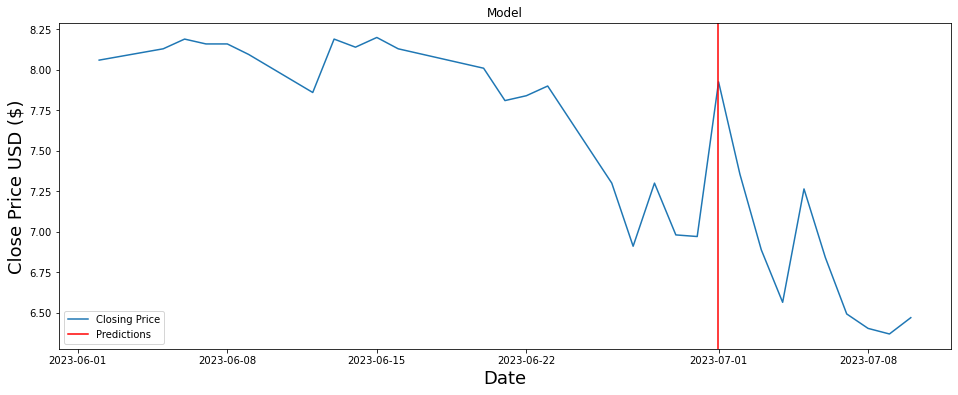

In [87]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(raw_data[-30:])
plt.axvline(x = datetime.today(), color='r')
plt.legend(['Closing Price', 'Predictions'], loc='lower left')
plt.show()